Beta0: 0.000000
Beta1: 0.074605
Beta2: 0.496961


C:\Users\aneek\AppData\Local\Temp\ipykernel_33060\659530675.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3['pred_std']=P2


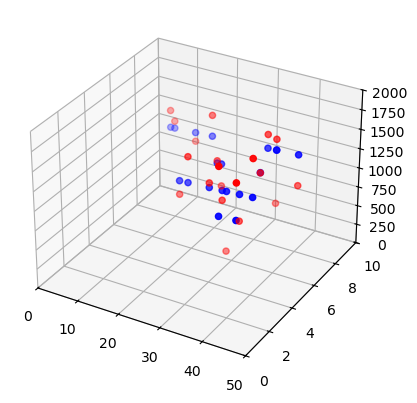

RMSE: 353.12001260673424
1782.5011968904444
1266.560023355097
48
18
1980
670
5
2


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu May  8 06:54:23 2025

@author: aneek
"""

import numpy as np
import os
#plot autocorrelation function
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
pd.set_option('display.max_column',None)
from numpy.linalg import eig
from numpy.linalg import cond
from mpl_toolkits import mplot3d
file_p='C:\\Users\\aneek\\My Drive\\data\\eat_time2.xlsx'
d1=pd.read_excel(file_p)
d1=sm.add_constant(d1)
d1['ET1']=(d1['Eat_time']-d1['Eat_time'].mean())/d1['Eat_time'].std()
d1['FN1']=(d1['Fam_num']-d1['Fam_num'].mean())/d1['Fam_num'].std()
d1['EX1']=(d1['Exp-USD']-d1['Exp-USD'].mean())/d1['Exp-USD'].std()
def RSS1(X1,TH1):
    t1=0.0
    n2=len(X1)
    for j in range(0,n2):
        t1=t1+((TH1[0]*X1.iloc[j]['const']+TH1[1]*X1.iloc[j]['ET1']+TH1[2]*X1.iloc[j]['FN1']-X1.iloc[j]['EX1'])**2)
    t1=0.5*t1
    return t1
def UP_TH(X1,B0):
    B1=np.array([0.0,0.0,0.0])
    n2=len(X1)
    t1=0.0
    for j in range(0,n2):
        t1=t1+((B0[0]*X1.iloc[j]['const']+B0[1]*X1.iloc[j]['ET1']+B0[2]*X1.iloc[j]['FN1']-X1.iloc[j]['EX1'])*X1.iloc[j]['const'])
    t1=0.01*t1
    B1[0]=B0[0]-t1
    t1=0.0
    for j in range(0,n2):
        t1=t1+((B0[0]*X1.iloc[j]['const']+B0[1]*X1.iloc[j]['ET1']+B0[2]*X1.iloc[j]['FN1']-X1.iloc[j]['EX1'])*X1.iloc[j]['ET1'])
    t1=0.01*t1
    B1[1]=B0[1]-t1
    t1=0.0
    for j in range(0,n2):
        t1=t1+((B0[0]*X1.iloc[j]['const']+B0[1]*X1.iloc[j]['ET1']+B0[2]*X1.iloc[j]['FN1']-X1.iloc[j]['EX1'])*X1.iloc[j]['FN1'])
    t1=0.01*t1
    B1[2]=B0[2]-t1
    return B1
TH0=np.array([0.0,0.0,0.0])
k1=RSS1(d1,TH0)
chk1=0.5
KL1=[]
iter=0
while (iter<10000 and chk1>0.0000000001):
    TH_X=np.array([0.0,0.0,0.0])
    iter=iter+1
    TH_X=UP_TH(d1,TH0)
    k2=RSS1(d1,TH_X)
    chk1=abs(k2-k1)
    KL1.append(k2)
    k1=k2
    TH0=TH_X
print(f"Beta0: {TH_X[0]:.6f}")
print(f"Beta1: {TH_X[1]:.6f}")
print(f"Beta2: {TH_X[2]:.6f}")
file_p='C:\\Users\\aneek\\My Drive\\data\\eat_time_test.xlsx'
d2=pd.read_excel(file_p)
d2=sm.add_constant(d2)
s5=d2['Exp-USD'].mean()
s6=d2['Exp-USD'].std()
d2['S_ET']=(d2['Eat_time']-d2['Eat_time'].mean())/d2['Eat_time'].std()
d2['S_FN']= (d2['Fam_num']-d2['Fam_num'].mean())/d2['Fam_num'].std()  
P2=[]
P3=[]
for j in range(0,len(d2)):
    h1=TH_X[0]*d2.iloc[j]['const']+TH_X[1]*d2.iloc[j]['S_ET']+TH_X[2]*d2.iloc[j]['S_FN']
    P2.append(h1)
    h2=s5+(h1*s6)
    P3.append(h2)
d3=d2[['const','Eat_time','Fam_num','Exp-USD']]
d3['pred_std']=P2
d3['pred_abs']=P3
fig = plt.figure()
ax = plt.axes(projection ='3d')
#plt.xlim(0,50)
#plt.ylim(0,2200)
ax.set_xlim(0,50)
ax.set_ylim(0,10)
ax.set_zlim(0,2000)
x=d3['Eat_time']
y=d3['Fam_num']
z=d3['Exp-USD']
z1=d3['pred_abs']
ax.scatter(x, y, z, color='red')
#plt.legend(loc="lower left")
x1=d3['Eat_time']
y1=d3['Fam_num']
ax.scatter(x1, y1, z1, color='blue')
plt.show()    
mse=mean_squared_error(d3['Exp-USD'],d3['pred_abs'])
rmse=np.sqrt(mse)
print(f"RMSE: {rmse}")
print(np.max(d3['pred_abs']))
print(np.min(d3['pred_abs']))
print(np.max(d2['Eat_time']))
print(np.min(d2['Eat_time']))
print(np.max(d3['Exp-USD']))
print(np.min(d3['Exp-USD']))
print(np.max(d3['Fam_num']))
print(np.min(d3['Fam_num']))
